# ⚡ Concurrent Agent Workflows wit GitHub Models (Python)

## 📋 Advanced Parallel Processing Tutorial

Dis notebook dey show **concurrent workflow patterns** wey dey use Microsoft Agent Framework. You go learn how to build high-performance workflows wey dey run parallel, where plenty AI agents go dey work at di same time, go make throughput better and fit handle complex multi-threaded business processes.

## 🎯 Learning Objectives

### 🚀 **Concurrent Processing Fundamentals**
- **Parallel Agent Execution**: Make plenty agents dey work at di same time for better efficiency
- **Workflow Orchestration**: Arrange concurrent operations wey go still keep data correct
- **Performance Optimization**: Get beta speedup wit parallel processing
- **Resource Management**: Use AI model resources well for concurrent operations

### 🏗️ **Advanced Concurrency Patterns**
- **Fork-Join Processing**: Share work among plenty agents and join di results
- **Pipeline Parallelism**: Make execution stages dey overlap for continuous throughput
- **Load Balancing**: Share work well among di available agent resources
- **Synchronization Points**: Arrange concurrent agents for important workflow stages

### 🏢 **Enterprise Concurrent Applications**
- **High-Volume Document Processing**: Process plenty documents at di same time
- **Real-Time Content Analysis**: Analyze incoming data streams concurrently
- **Batch Processing Optimization**: Make throughput better for large-scale operations
- **Multi-Modal Analysis**: Process different content types (text, images, data) parallel

## ⚙️ Prerequisites & Setup

### 📦 **Required Dependencies**

Install Agent Framework wey get concurrent workflow capabilities:

```bash
pip install agent-framework-core -U
```

### 🔑 **GitHub Models Configuration**

**Environment Setup (.env file):**
```env
GITHUB_TOKEN=your_github_personal_access_token
GITHUB_ENDPOINT=https://models.inference.ai.azure.com
GITHUB_MODEL_ID=gpt-4o-mini
```

**Concurrent Processing Considerations:**
- **Rate Limits**: Check GitHub Models API rate limits for concurrent requests
- **Resource Usage**: Think about memory and CPU usage wit plenty concurrent agents
- **Error Handling**: Put strong error recovery for parallel operations

### 🏗️ **Concurrent Workflow Architecture**

```mermaid
graph TD
    A[Workflow Start] --> B[Concurrent Execution]
    B --> C[Agent Pool 1]
    B --> D[Agent Pool 2]
    B --> E[Agent Pool 3]
    C --> F[Result Aggregation]
    D --> F
    E --> F
    F --> G[Final Output]
    
    H[GitHub Models API] --> C
    H --> D
    H --> E
```

**Key Benefits:**
- **⚡ Performance**: Beta speedup wit parallel execution
- **📈 Scalability**: Handle more work without adding more time
- **🔄 Efficiency**: Use di available computational resources well
- **🎯 Throughput**: Process more work for di same time

## 🎨 **Concurrent Workflow Design Patterns**

### 🔍 **Research & Analysis Pipeline**
```
Research Task → Parallel Research Agents → Content Synthesis → Quality Review
```

### 📊 **Data Processing Workflow**
```
Input Data → Concurrent Processing Agents → Result Aggregation → Final Report
```

### 🎭 **Content Creation Pipeline**
```
Content Brief → Parallel Content Generators → Review & Merge → Final Content
```

### 🔄 **Multi-Stage Processing**
```
Input → Stage 1 (Concurrent) → Stage 2 (Concurrent) → Stage 3 (Sequential) → Output
```

## 🏢 **Enterprise Performance Benefits**

### ⚡ **Throughput Optimization**
- **Parallel Execution**: Plenty agents dey work at di same time
- **Resource Utilization**: Use AI model capacity well
- **Time Reduction**: Reduce total processing time well well
- **Scalable Architecture**: Add more concurrent agents as you need am

### 🛡️ **Reliability & Resilience**
- **Fault Tolerance**: If one agent fail, e no go stop di whole workflow
- **Error Isolation**: Problem for one concurrent branch no go affect di others
- **Graceful Degradation**: System go still dey work even if agent capacity reduce
- **Recovery Mechanisms**: Retry and handle errors for failed operations automatically

### 📊 **Monitoring & Observability**
- **Concurrent Execution Tracking**: Check progress of all parallel operations
- **Performance Metrics**: Measure speedup and efficiency gains
- **Resource Usage Analytics**: Optimize how you dey allocate concurrent agents
- **Bottleneck Identification**: Find and fix performance problems

Make we build high-performance concurrent AI workflows! 🚀


In [1]:
! pip install agent-framework-core -U

In [2]:
import os
from typing import Any

from agent_framework import ChatMessage, ConcurrentBuilder,WorkflowViz
from agent_framework.openai import OpenAIChatClient

In [3]:
chat_client = OpenAIChatClient(base_url=os.environ.get("GITHUB_ENDPOINT"), api_key=os.environ.get("GITHUB_TOKEN"), model_id="gpt-4o" )

In [4]:
ResearcherAgentName = "Researcher-Agent"
ResearcherAgentInstructions = "You are my travel researcher, working with me to analyze the destination, list relevant attractions, and make detailed plans for each attraction."

In [5]:
PlanAgentName = "Plan-Agent"
PlanAgentInstructions = "You are my travel planner, working with me to create a detailed travel plan based on the researcher's findings."

In [6]:
research_agent   = chat_client.create_agent(
        instructions=(
           ResearcherAgentInstructions
        ),
        name=ResearcherAgentName,
    )

plan_agent = chat_client.create_agent(
        instructions=(
            PlanAgentInstructions
        ),
        name=PlanAgentName,
    )

In [7]:
workflow = ConcurrentBuilder().participants([research_agent, plan_agent]).build()

In [8]:
print("Generating workflow visualization...")
viz = WorkflowViz(workflow)
# Print out the mermaid string.
print("Mermaid string: \n=======")
print(viz.to_mermaid())
print("=======")
# Print out the DiGraph string.
print("DiGraph string: \n=======")
print(viz.to_digraph())
print("=======")
svg_file = viz.export(format="svg")
print(f"SVG file saved to: {svg_file}")

Generating workflow visualization...
Mermaid string: 
flowchart TD
  dispatcher["dispatcher (Start)"];
  Researcher_Agent["Researcher-Agent"];
  Plan_Agent["Plan-Agent"];
  aggregator["aggregator"];
  fan_in__aggregator__69d73de8((fan-in))
  Plan_Agent --> fan_in__aggregator__69d73de8;
  Researcher_Agent --> fan_in__aggregator__69d73de8;
  fan_in__aggregator__69d73de8 --> aggregator;
  dispatcher --> Researcher_Agent;
  dispatcher --> Plan_Agent;
DiGraph string: 
digraph Workflow {
  rankdir=TD;
  node [shape=box, style=filled, fillcolor=lightblue];
  edge [color=black, arrowhead=vee];

  "dispatcher" [fillcolor=lightgreen, label="dispatcher\n(Start)"];
  "Researcher-Agent" [label="Researcher-Agent"];
  "Plan-Agent" [label="Plan-Agent"];
  "aggregator" [label="aggregator"];

  "fan_in::aggregator::69d73de8" [shape=ellipse, fillcolor=lightgoldenrod, label="fan-in"];
  "Plan-Agent" -> "fan_in::aggregator::69d73de8";
  "Researcher-Agent" -> "fan_in::aggregator::69d73de8";
  "fan_in::aggre

Attempting to display SVG file at: C:\Users\kinfeylo\AppData\Local\Temp\tmpoq68cqjk.svg


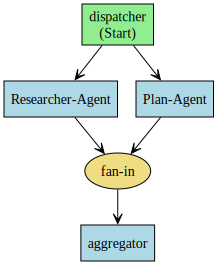

In [9]:
from IPython.display import SVG, display, HTML
import os

print(f"Attempting to display SVG file at: {svg_file}")

if svg_file and os.path.exists(svg_file):
    try:
        # Preferred: direct SVG rendering
        display(SVG(filename=svg_file))
    except Exception as e:
        print(f"⚠️ Direct SVG render failed: {e}. Falling back to raw HTML.")
        try:
            with open(svg_file, "r", encoding="utf-8") as f:
                svg_text = f.read()
            display(HTML(svg_text))
        except Exception as inner:
            print(f"❌ Fallback HTML render also failed: {inner}")
else:
    print("❌ SVG file not found. Ensure viz.export(format='svg') ran successfully.")

In [10]:
events = await workflow.run("Plan a trip to Seattle in December")
outputs = events.get_outputs()

In [11]:
if outputs:
        print("===== Final Aggregated Conversation (messages) =====")
        for output in outputs:
            messages: list[ChatMessage] | Any = output
            for i, msg in enumerate(messages, start=1):
                name = msg.author_name if msg.author_name else "user"
                print(f"{'-' * 60}\n\n{i:02d} [{name}]:\n{msg.text}")

===== Final Aggregated Conversation (messages) =====
------------------------------------------------------------

01 [user]:
Plan a trip to Seattle in December
------------------------------------------------------------

02 [Researcher-Agent]:
Seattle is a wonderful place to visit in December, with vibrant winter festivities, seasonal attractions, and gorgeous views of the Pacific Northwest. Despite the chilly weather and occasional rain, Seattle’s charm shines through its indoor and outdoor attractions. Here's a detailed plan for your trip:

---

### **Destination Overview: Seattle in December**
- **Weather**: Expect average highs of around 47°F (8°C) and lows near 37°F (3°C). Rain is frequent, so bring waterproof clothing.
- **Packing List**:
  - Warm layers (sweaters, coats, gloves, and hats).
  - Comfortable walking shoes (water-resistant is ideal).
  - Umbrella or rain jacket.

---

### **Day 1: Exploring Downtown Seattle**
#### **Morning**: **Pike Place Market**
- One of Seattl

<!-- CO-OP TRANSLATOR DISCLAIMER START -->
**Disclaimer**:  
Dis dokyument don use AI transleto service [Co-op Translator](https://github.com/Azure/co-op-translator) do di translation. Even as we dey try make am accurate, abeg sabi say machine translation fit get mistake or no dey correct well. Di original dokyument for im native language na di main source wey you go trust. For important mata, e better make professional human transleto check am. We no go fit take blame for any misunderstanding or wrong interpretation wey fit happen because you use dis translation.
<!-- CO-OP TRANSLATOR DISCLAIMER END -->
